In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [68]:
data = datasets.load_iris()

data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [69]:
x = data.data
y = data.target
columns = data.feature_names

In [70]:
df = pd.DataFrame(x,columns = columns)
df["target"] = y
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [71]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [72]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [73]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [74]:
df.shape

(150, 5)

In [75]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [76]:
df.drop_duplicates()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# detecting outliers

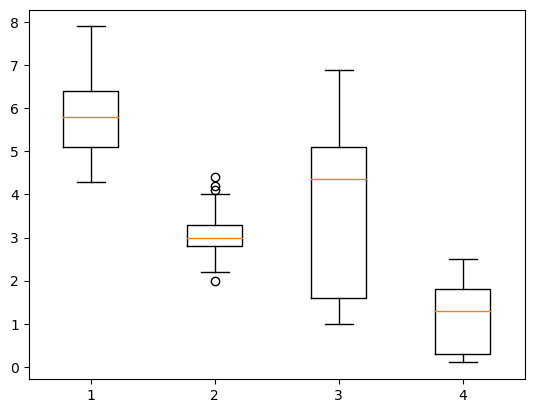

In [77]:
plt.boxplot(df[["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)"]])
plt.show()

In [78]:
df.clip(df.quantile(0.2),df.quantile(0.9),axis = 1,inplace = True)


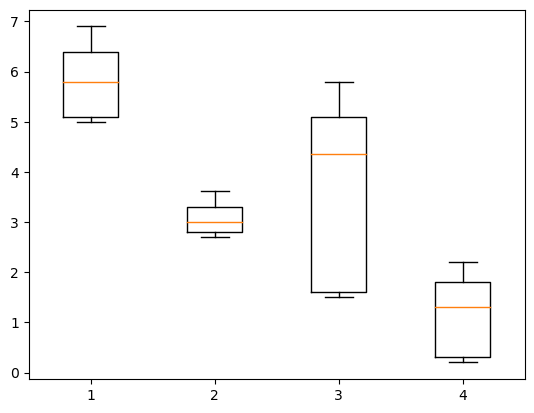

In [79]:
plt.boxplot(df[["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)"]])
plt.show()

# Feature Scaling

In [80]:
xnorm = Normalizer()
x_norm = xnorm.fit_transform(x)
x_norm

array([[0.80089346, 0.54963277, 0.2355569 , 0.03140759],
       [0.829997  , 0.4979982 , 0.2489991 , 0.03319988],
       [0.81617018, 0.52234891, 0.24485105, 0.03264681],
       [0.823108  , 0.51032696, 0.2469324 , 0.03292432],
       [0.78811041, 0.56743949, 0.23643312, 0.03152442],
       [0.80282776, 0.53670523, 0.25274207, 0.05946872],
       [0.80166921, 0.54513506, 0.24050076, 0.04810015],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.83682741, 0.4853599 , 0.25104822, 0.0334731 ],
       [0.823108  , 0.51032696, 0.2469324 , 0.03292432],
       [0.80965708, 0.54127075, 0.22490474, 0.0299873 ],
       [0.79900347, 0.54332236, 0.25568111, 0.03196014],
       [0.829997  , 0.4979982 , 0.2489991 , 0.03319988],
       [0.829997  , 0.4979982 , 0.2489991 , 0.03319988],
       [0.82889205, 0.51591385, 0.21436863, 0.02858248],
       [0.82330666, 0.52142755, 0.21665965, 0.05777591],
       [0.80856717, 0.54054213, 0.22460199, 0.05989386],
       [0.80040015, 0.54929422,

In [81]:
df_norm = pd.DataFrame(x_norm,columns = columns)
df_norm

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.800893,0.549633,0.235557,0.031408
1,0.829997,0.497998,0.248999,0.033200
2,0.816170,0.522349,0.244851,0.032647
3,0.823108,0.510327,0.246932,0.032924
4,0.788110,0.567439,0.236433,0.031524
...,...,...,...,...
145,0.723448,0.323932,0.561482,0.237550
146,0.724617,0.310550,0.575093,0.218535
147,0.716539,0.330710,0.573231,0.220474
148,0.676475,0.370970,0.589188,0.240040


<Axes: >

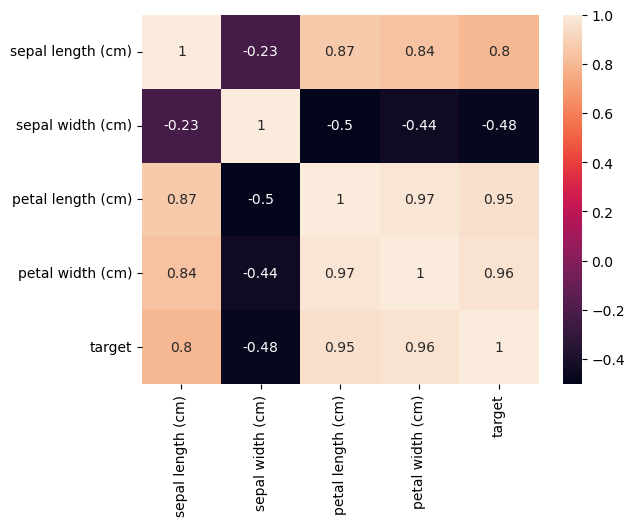

In [82]:
sns.heatmap(df.corr(),annot = True)

#  feature selection

In [83]:
x = df[["petal length (cm)","petal width (cm)"]]
y = df[["target"]]

# KNN

# below 9 then classification or more than 9 then regression

In [84]:
len(y['target'].unique())

3

In [85]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [86]:
k = KNeighborsClassifier()

In [87]:
k.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [88]:
y_pred = k.predict(x_test)

In [93]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [102]:
acc = accuracy_score(y_test,y_pred)

In [103]:
acc

0.98

In [110]:
acc1 = accuracy_score(y_train,k.predict(x_train))

In [111]:
acc1

0.96

In [113]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]
